In [62]:
import pandas as pd
import matplotlib.pyplot as plt


In [63]:
df = pd.read_csv('chipotle.tsv',sep='\t')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


<Axes: title={'center': 'Sales Top 10'}, ylabel='count'>

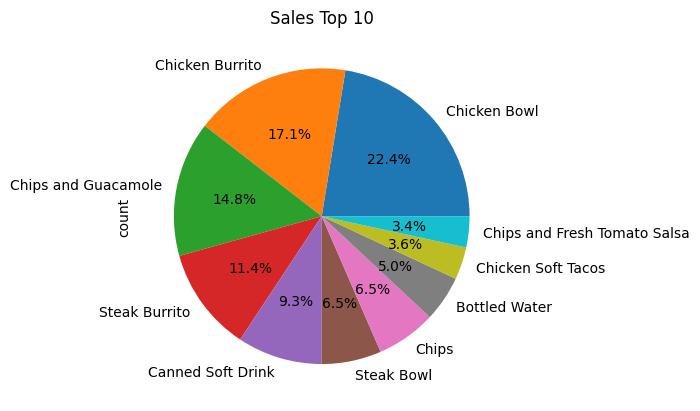

In [133]:
itemrank = df['item_name'].value_counts()
itemrank[:10]
itemrank[:10].plot.pie(title = 'Sales Top 10',autopct = '%.1f%%')

In [65]:
df['item_price'] = df['item_price'].str[1:].astype(float)

In [66]:
df['item_price']

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

<Axes: title={'center': 'Product sales less than $10'}, ylabel='count'>

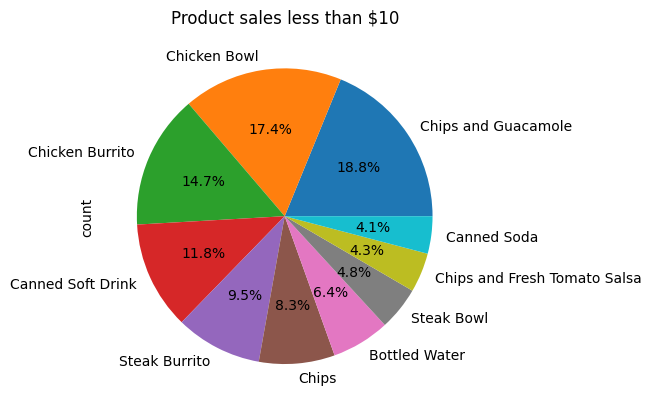

In [132]:
itemrank1 = df['item_name'][(df['item_price'] / df['quantity']) <= 10].value_counts()
itemrank1[:10].plot.pie(title='Product sales less than $10',autopct = '%.1f%%')


In [68]:
itemrank2 = df['item_name'][(df['quantity'] == 1 )&(df['item_price']>= 10)&(df['choice_description'].isnull())].value_counts()
itemrank2 

Series([], Name: count, dtype: int64)

In [116]:
option = df['choice_description'].str.replace('[','')
option1 = option.str.replace(']','')

option2 = option1.str.split(', ').explode()
option2.value_counts()



choice_description
Rice                                    2389
Cheese                                  2281
Lettuce                                 1742
Sour Cream                              1711
Black Beans                             1342
Fresh Tomato Salsa                      1046
Guacamole                               1037
Fajita Vegetables                        722
Pinto Beans                              582
Roasted Chili Corn Salsa                 457
Fresh Tomato Salsa (Mild)                351
Tomatillo Red Chili Salsa                325
Fajita Veggies                           302
Roasted Chili Corn Salsa (Medium)        270
Tomatillo-Red Chili Salsa (Hot)          259
Tomatillo Green Chili Salsa              230
Diet Coke                                134
Tomatillo-Green Chili Salsa (Medium)     128
Coke                                     123
Sprite                                    77
Lemonade                                  33
Fresh Tomato (Mild)                 

<Axes: title={'center': 'Top10\nchoice_description'}, ylabel='count'>

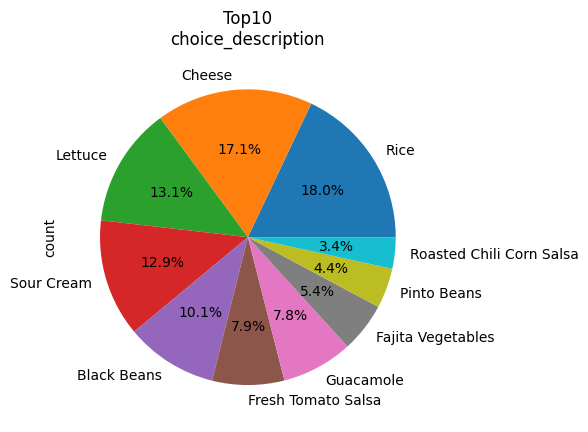

In [131]:
option2.value_counts()[:10].plot.pie(title = 'Top10\nchoice_description',autopct = '%.1f%%')

<Axes: title={'center': 'Sales rate Top10'}, ylabel='item_name'>

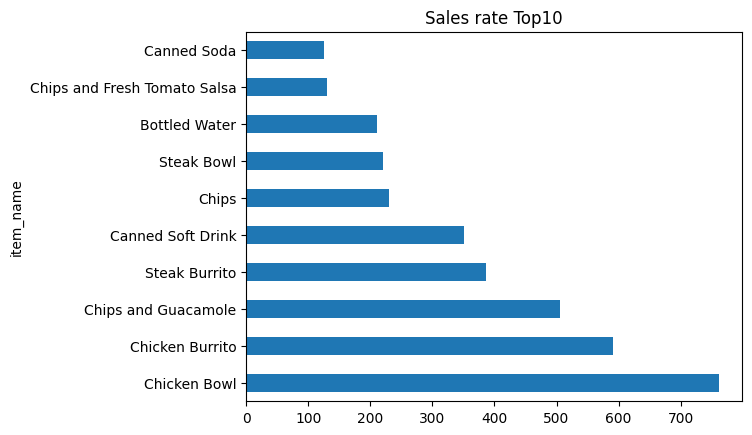

In [130]:
sales = df.groupby('item_name')['quantity'].sum().sort_values(ascending=False)


sales[:10].plot.barh(title ='Sales rate Top10')
